In [185]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPolygon
from rasterio import features
%matplotlib inline

In [186]:
pwd

'/Users/Evan/notebooks_emb'

In [187]:
# Here are your input shapes (lines A, B, C)
A = LineString([Point(10.0, 2.), Point(10., 10.)]).buffer(0.5)
B = LineString([Point(2., 6.), Point(14., 6.)]).buffer(0.5)
C = LineString([Point(4., 2.), Point(12., 6.)]).buffer(0.5)

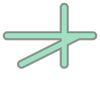

In [188]:
# list the shapes so they are iterable
shapes = [A, B, C]

unioned = shapes[0].union(shapes[1])
for shape in shapes[2:]:
    unioned = unioned.union(shape)

unioned

size of heatmap is (14, 14)


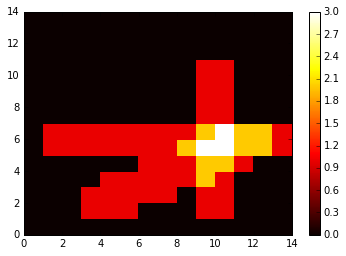

In [192]:
list_of_shapes = []
weight = 1
for i in shapes:
    list_of_shapes.append((i, weight))

def shapely_heatmap(image_size, list_of_shapes):
    """
    returns a heatmap the same size as the test image
    """
    heatmap = np.zeros(image_size)
    for i, line in enumerate(shape_iter): 
        heatmap += features.rasterize(((g, v) for g, v in shape_iter[i:i+1]), out_shape=heatmap.shape,
                                       all_touched=True)
    return heatmap
        
heatmap = shapely_heatmap((14,14), list_of_shapes)
print('size of heatmap is', heatmap.shape)
plt.pcolor(heatmap, cmap='hot')
plt.colorbar()